# Time Series Problems

## Step 1 : Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization

### Tensorboard Activation

In [ ]:
# %rmdir /Q /S ./logs
# %load_ext tensorboard

# %tensorboard --logdir --port=6786 logs/fit

## Step 2 : Load Dataset

In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [6]:
path = tf.keras.utils.get_file('sunspots.csv', 
                               '  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv')
print (path)

C:\Users\Amir\.keras\datasets\sunspots.csv


,Sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


Dataset total months: ' + 3235 + ' ==> years:' 269



<AxesSubplot:xlabel='Date'>

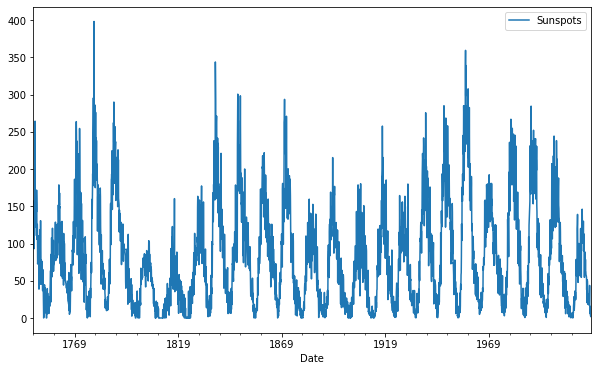

In [7]:
df = pd.read_csv(path, index_col='Date', parse_dates=True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.columns = ['Sunspots']   # reaname column
df.head()

print(f"Dataset total months: ' + {len(df)} + ' ==> years:' {len(df)//12}\n")

df.plot(figsize=(10,6))

## Step 3 : Train Test Split

In [10]:
split_time = 3000

train = df[:split_time]
test = df[split_time:]


In [14]:
print(f"Size of dataset in months : {len(df)}")
print(f"Size of dataset in years  : {len(df)//12}")
print(f"Size of train in months   : {len(train)}") 
print(f"Size of train in years    : {len(train)//12}") 
print(f"Size of test in months    : {len(test)}") 
print(f"Size of test in years     : {len(test)//12}") 

Size of dataset in months : 3235
Size of dataset in years  : 269
Size of train in months   : 3000
Size of train in years    : 250
Size of test in months    : 235
Size of test in years     : 19


## Step 4 : Normalization

In [15]:
# Otherwise we have to use Lambda Layers

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

MinMaxScaler()

## Step 5 : Time Series Generator

In [16]:
# Please modify based on the problem : 

n_features   = 1     # only one value in the series (multivariate > 1)
n_input      = 60    # 60 months or 5 years time step interval for the time series
n_batch_size = 32    # what is the batch size of 32

In [17]:
train_generator = TimeseriesGenerator(
                        train, 
                        train,
                        length = n_input, 
                        sampling_rate = 1, 
                        batch_size = n_batch_size, 
                        shuffle = True
                    )

In [18]:
# check the dimentions
x, y = train_generator[1]
print(x.shape)
print(y.shape)

(32, 60, 1)
(32, 1)


## Step 6 : Models

In [19]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()

In [20]:
log_dir = ""
def set_log_dir(model_name):
    log_dir = "logs/fit/"+ model_name +"_"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 

In [21]:
def fit_model_and_show_results (model):
  
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  model.summary()
  history = model.fit(train_generator, epochs = epochs, verbose = 1, 
                      callbacks=[tensorboard_callback])
  plot_graphs(history, "loss")
  #plot_graphs(history, "accuracy")

In [23]:
epochs = 100
model = Sequential()
model.add(Dense(20, input_shape = (n_input, n_features), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mse",
              optimizer=optimizer)
history = model.fit(train_generator, epochs=epochs)

Epoch 1/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0772
Epoch 9/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0782
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 11/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 12/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0780
Epoch 13/100
92/92 [=================

In [24]:
history.history.keys()

dict_keys(['loss'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60, 20)            40        
_________________________________________________________________
dense_4 (Dense)              (None, 60, 10)            210       
_________________________________________________________________
dense_5 (Dense)              (None, 60, 1)             11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

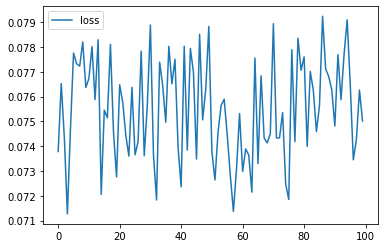

In [26]:
pd.DataFrame(history.history).plot()

<AxesSubplot:>

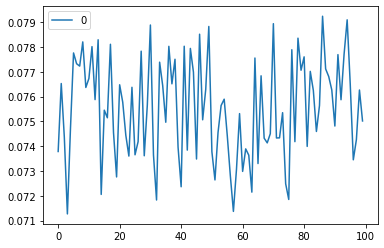

In [27]:
pd.DataFrame(history.history['loss']).plot()

## Models

### ANN

In [ ]:
epochs = 100
set_log_dir("ann")

model_ann = Sequential()
model_ann.add(Dense(20, input_shape=(n_input, n_features), activation="relu"))
model_ann.add(Dense(10, activation='relu'))
model_ann.add(Dense(1, activation='relu'))

model_ann.summary()
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model_ann.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_ann)

### Simple RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
epochs = 100
set_log_dir("rnn")

model_rnn = Sequential()
model_rnn.add(SimpleRNN(1, input_shape=(n_input, n_features)))
optimizer = tf.keras.optimizers.Adam(lr=0.005) 
model_rnn.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_rnn)

### LSTM with MSE

In [ ]:
epochs = 100
set_log_dir("lstm")

model_lstm = Sequential()
model_lstm.add(LSTM(60, return_sequences=True, input_shape = (n_input,n_features)))
model_lstm.add(LSTM(60))
model_lstm.add(Dense(30, activation='relu'))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1))
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model_lstm.compile(loss="mse", optimizer=optimizer)
fit_model_and_show_results(model_lstm)

### LSTM  - Huber

In [ ]:
epochs = 100
set_log_dir("lstm_h")

model_lstm_h = Sequential()

model_lstm_h.add(LSTM(60, input_shape = (n_input,n_features), return_sequences=True))
model_lstm_h.add(LSTM(60))
model_lstm_h.add(Dense(30, activation='relu'))
model_lstm_h.add(Dense(10, activation='relu'))
model_lstm_h.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model_lstm_h.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

fit_model_and_show_results(model_lstm_h)

### LSTM with Dropout

In [ ]:
epochs = 100
set_log_dir("lstm_d")

model_lstm_d = Sequential()
model_lstm_d.add(LSTM(60, activation='relu', input_shape=(n_input,n_features)))
model_lstm_d.add(Dropout(0.15))
model_lstm_d.add(Dense(1))
model_lstm_d.compile(optimizer='adam', loss='mse')
fit_model_and_show_results(model_lstm_d)

### CNN with LSTM

In [ ]:
epoch = 100
set_log_dir("cnn_lstm")

model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]))
model_cnn_lstm.add(LSTM(64, return_sequences=True))
model_cnn_lstm.add(LSTM(64, return_sequences=True))
model_cnn_lstm.add(Dense(30, activation="relu"))
model_cnn_lstm.add(Dense(10, activation="relu"))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.add(tf.keras.layers.Lambda(lambda x: x * 400))

fit_model_and_show_results(model_cnn_lstm)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

epoch = 500
set_log_dir("cnn_lstm_f")

model_cnn_lstm_f = Sequential()
model_cnn_lstm_f.add(Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]))
model_cnn_lstm_f.add(LSTM(60, return_sequences=True))
model_cnn_lstm_f.add(LSTM(60, return_sequences=True))
model_cnn_lstm_f.add(Dense(30, activation="relu"))
model_cnn_lstm_f.add(Dense(10, activation="relu"))
model_cnn_lstm_f.add(Dense(1))
model_cnn_lstm_f.add(tf.keras.layers.Lambda(lambda x: x * 400))

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model_cnn_lstm_f.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

fit_model_and_show_results(model_cnn_lstm_f)

In [ ]:
#plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-8, 1e-4, 0, 60])

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.summary()


history = model.fit(train_set,epochs=500)

### CNN with LSTM

In [ ]:
epochs = 500
set_log_dir("cnn_lstm_f")

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model_cnn_lstm_fmodel_cnn_lstm_f = Sequential()
model_cnn_lstm_f.add(Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]))
model_cnn_lstm_f.add(LSTM(64, return_sequences=True))
model_cnn_lstm_f.add(LSTM(64, return_sequences=True))
model_cnn_lstm_f.add(Dense(30, activation="relu"))
model_cnn_lstm_f.add(Dense(10, activation="relu"))
model_cnn_lstm_f.add(Dense(1))
model_cnn_lstm_f.add(tf.keras.layers.Lambda(lambda x: x * 400))


lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_cnn_lstm_f.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model_cnn_lstm_f.summary()
history = model_cnn_lstm_f.fit(train_generator, epochs = epochs, verbose = 1, 
                      callbacks=[tensorboard_callback, lr_schedule])
plot_graphs(history, "loss")



## TODO

### Select Best Model 

In [ ]:
model = model_lstm

## Step 7 : Seed Data

In [33]:
# Set the seed value to grow the prediction
batch = train[-n_input:].reshape((1, n_input, n_features))   # stepping stone value

In [34]:
batch.shape

(1, 60, 1)

## Step 8 : Prediction

In [35]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))   # stepping stone value

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0])                # predict and save in list
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1) # next value for prediction

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, 
                          columns=['Prediction'])

In [ ]:
df_predict.head(2)

## Step 9 : Prediction + Actual
  

In [3]:
df_test = pd.concat([df,df_predict], axis=1)

NameError: name 'pd' is not defined

In [2]:
# We have done Predictions for these date times
df_test[-n_input:].index   # for the past 18 months

NameError: name 'df_test' is not defined

## Step 10 : Evaluation
 

## Step 11 : Plot
 

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df_test.index, df_test['Sunspots'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(["Sunspots", "Prediction"], loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

## Step 12 : Future Forecasting


In [ ]:
# We need to make it 2 dimimention - because RNN needs 3D
series_2d = np.array(df['Sunspots'])
print(series_2d.shape)
series_2d = series_2d.reshape((len(series_2d), n_features))
print(series_2d.shape)

In [ ]:
forecast=[]
for time in range(len(series_2d) - n_input):
  forecast.append(model.predict(series_2d[time : time + n_input][np.newaxis]))

In [ ]:
forecast = forecast[split_time-n_input:]

In [ ]:
results = np.array(forecast)[:, 0, 0]
results.shape

In [ ]:
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

## Step 13 : Conclusion